In [1]:
## Genearting histograms is an expensive operation, so I am going to generat ethem when we build the initial image stack
import girder_client
folderId='6436ff755605cc63355cde7f'

gc = girder_client.GirderClient(apiUrl="https://candygram.neurology.emory.edu/api/v1")
gc.authenticate(interactive=True)

Login or email: admin
Password for admin: ········


{'_accessLevel': 2,
 '_id': '638e2ae7cd1d7fad17b9dd1f',
 '_modelType': 'user',
 'admin': True,
 'created': '2022-12-05T17:31:19.547000+00:00',
 'email': 'admin@nowhere.nil',
 'emailVerified': True,
 'firstName': 'Admin',
 'groupInvites': [],
 'groups': [],
 'lastName': 'Admin',
 'login': 'admin',
 'otp': False,
 'public': True,
 'size': 0,
 'status': 'enabled'}

In [3]:

_recentThresholds = {}


def histogramThreshold(histogram, threshold, fromMax=False):
    """
    Given a histogram and a threshold on a scale of [0, 1], return the bin
    edge that excludes no more than the specified threshold amount of values.
    For instance, a threshold of 0.02 would exclude at most 2% of the values.

    :param histogram: a histogram record for a specific channel.
    :param threshold: a value from 0 to 1.
    :param fromMax: if False, return values excluding the low end of the
        histogram; if True, return values from excluding the high end of the
        histogram.
    :returns: the value the excludes no more than the threshold from the
        specified end.
    """
    key = (id(histogram), threshold, fromMax)
    if key in _recentThresholds:
        return _recentThresholds[key]
    hist = histogram['hist']
    edges = histogram['bin_edges']
    samples = histogram['samples'] if not histogram.get('density') else 1
    if fromMax:
        hist = hist[::-1]
        edges = edges[::-1]
    tally = 0
    result = edges[-1]
    for idx in range(len(hist)):
        if tally + hist[idx] > threshold * samples:
            if not idx:
                result = histogram['min' if not fromMax else 'max']
            else:
                result = edges[idx]
            break
        tally += hist[idx]
    if len(_recentThresholds) > 100:
        _recentThresholds.empty()
    _recentThresholds[key] = result
    return result


In [76]:
itemSet = gc.get(f"resource/{folderId}/items?type=folder")
for i in itemSet:
    if 'largeImage' in i:
#         print(i['name'])
#         print(i['_id'])
        itemId = i['_id']
        try:
            imageHist = gc.get(f'/item/{itemId}/tiles/histogram?rangeMax=1000')
#         print(len(imageHist))
            histThresh = histogramThreshold(imageHist[0],threshold=0.02)
            print(histThresh,"threshold for",i['name'],itemId)
        except:
            print("Something weird happened for",i['name'])


Something weird happened for FOXP3_MAP01938_0000_0E_01_region_001.tif
Something weird happened for LYSOZYME_MAP01938_0000_0E_01_region_001.tif
Something weird happened for SOX9_MAP01938_0000_0E_01_region_001.tif
Something weird happened for MAP01938_0000_0E_01_region_001_stromal_cell_segmentation.tif
Something weird happened for CD11B_MAP01938_0000_0E_01_region_001.tif
Something weird happened for VIMENTIN_MAP01938_0000_0E_01_region_001.tif
Something weird happened for COLLAGEN_MAP01938_0000_0E_01_region_001.tif
Something weird happened for SMA_MAP01938_0000_0E_01_region_001.tif
Something weird happened for OLFM4_MAP01938_0000_0E_01_region_001.tif
Something weird happened for CD45_MAP01938_0000_0E_01_region_001.tif
Something weird happened for PDL1_MAP01938_0000_0E_01_region_001.tif
Something weird happened for MAP01938_0000_0E_01_region_001_epithelial_cell_segmentation.tif
Something weird happened for HTA11_8622_0000_01E_01_region_001_LYSOZYME.tif
Something weird happened for HTA11_86

0.0

In [ ]:
import plotly_express as px
px.bar(x=imageHist[0]['bin_edges'][1:],y=imageHist[0]['hist'])

In [16]:
#https://datacarpentry.org/image-processing/05-creating-histograms/

# im_roi, _ = ts.getRegion(
#     region=dict(left=10000, top=10000, width=1000, height=1000, units='base_pixels'),
#     format=large_image.tilesource.TILE_FORMAT_NUMPY
# )

# plt.imshow(im_roi)

SyntaxError: invalid syntax (2179145963.py, line 1)

In [18]:
#http://megabrain.neurology.emory.edu/api/v1/item/641ba836867536bb7a225547/tiles/thumbnail



Text(0, 0.5, 'Pixel count')

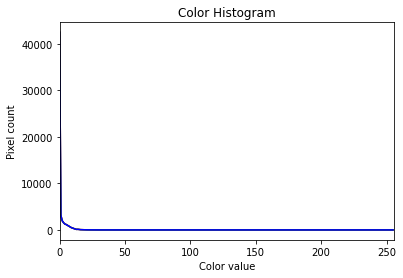

In [31]:
import matplotlib.pyplot as plt
import numpy as np
import imageio.v3 as iio
i = iio.imread(imgData.content)
imgData = gc.get("item/6436ff795605cc63355cde85/tiles/thumbnail",jsonResp=False)

# tuple to select colors of each channel line
colors = ("red", "green", "blue")

# create the histogram plot, with three lines, one for
# each color

plt.figure()
plt.xlim([0, 256])
for channel_id, color in enumerate(colors):
    histogram, bin_edges = np.histogram(
        i[:, :, channel_id], bins=256, range=(0, 256)
    )
    plt.plot(bin_edges[0:-1], histogram, color=color)

plt.title("Color Histogram")
plt.xlabel("Color value")
plt.ylabel("Pixel count")

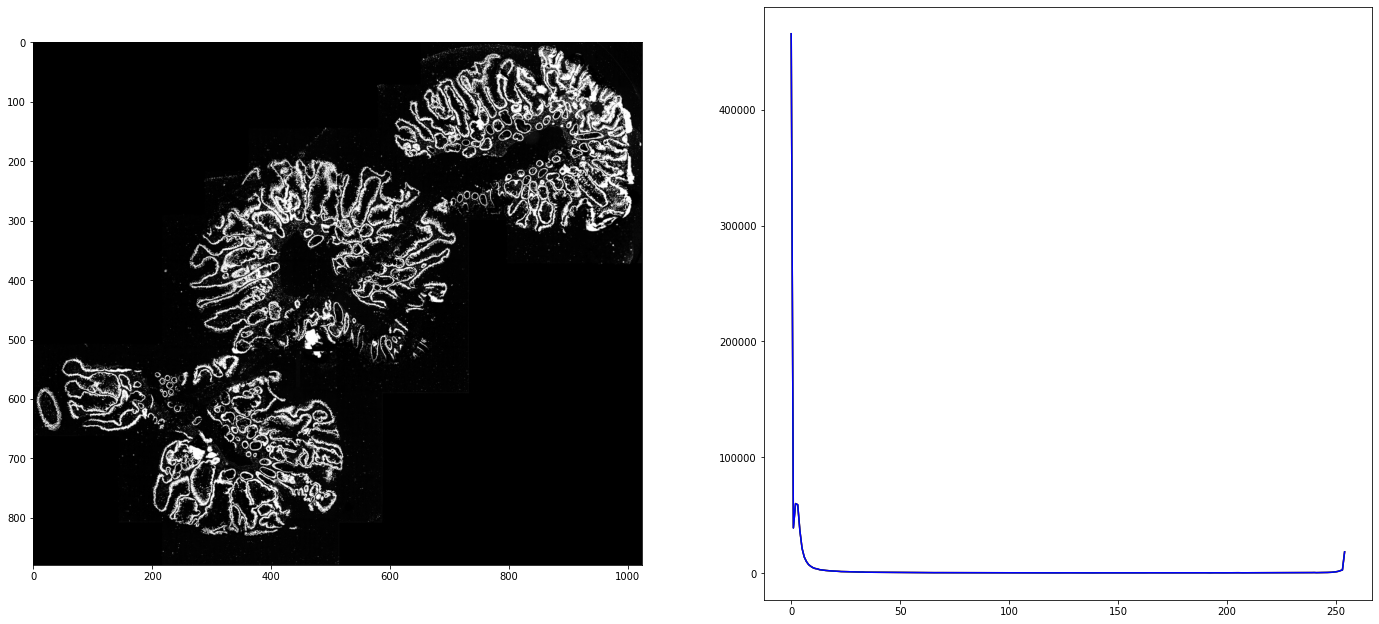

In [70]:
imgStyle = {"min":0,"max":10000}
imgData = gc.get('item/6436ff795605cc63355cde85/tiles/region?units=base_pixels&width=1024&style={"min":0,"max":1000}',jsonResp=False)
i = iio.imread(imgData.content)

# region?units=base_pixels&width=1024&exact=false&encoding=JPEG&jpegQuality=95&jpegSubsampling=0&contentDisposition=inline
fig = plt.figure( figsize=(24,24))
ax1 = fig.add_subplot(2,2,1)
ax1.imshow(i)
# tuple to select colors of each channel line
colors = ("red", "green", "blue")

ax2 = fig.add_subplot(2,2,2)
# ax2.imshow()
# plt.figure()
# ax2.xlim([0, 256])
for channel_id, color in enumerate(colors):
    histogram, bin_edges = np.histogram(
        i[:, :, channel_id], bins=256
    )
    ax2.plot(bin_edges[0:-1], histogram, color=color)

# # ax2.title  = "Color Histogram"
# # ax2.xlabel= ("Color value")
# # ax2.ylabel= ("Pixel count")

# # _, axs = plt.subplots(n_row, n_col, figsize=(24, 24))
# # axs = axs.flatten()
# # for img, ax in zip(imgs, axs):
# #     ax.imshow(img)
# # plt.show()


# fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(24, 24))
# axes[0].plot(ax2)
# axes[1].plot(i)
# fig.tight_layout()

In [ ]:
for i in gc.list

In [ ]:
imageIdx = widgets.IntSlider(
    value=1.0,
    min=0,
    max=gen,
    step=1.0,
    description='Month:',
    continuous_update=False
)

use_date = widgets.Checkbox(
    description='Date: ',
    value=True,
)

container = widgets.HBox(children=[use_date, month])

textbox = widgets.Dropdown(
    description='Airline:   ',
    value='DL',
    options=df['carrier'].unique().tolist()
)

origin = widgets.Dropdown(
    options=list(df['origin'].unique()),
    value='LGA',
    description='Origin Airport:',
)


# Assign an empty figure widget with two traces
trace1 = go.Histogram(x=df['arr_delay'], opacity=0.75, name='Arrival Delays')
trace2 = go.Histogram(x=df['dep_delay'], opacity=0.75, name='Departure Delays')
g = go.FigureWidget(data=[trace1, trace2],
                    layout=go.Layout(
                        title=dict(
                            text='NYC FlightDatabase'
                        ),
                        barmode='overlay'
                    ))

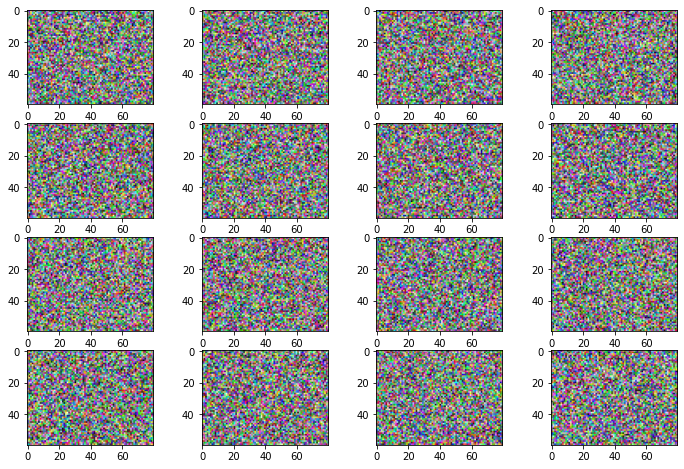

In [52]:
import matplotlib.pyplot as plt
import numpy as np

def plot_image_grid(images, ncols=None, cmap='gray'):
    '''Plot a grid of images'''
    if not ncols:
        factors = [i for i in range(1, len(images)+1) if len(images) % i == 0]
        ncols = factors[len(factors) // 2] if len(factors) else len(images) // 4 + 1
    nrows = int(len(images) / ncols) + int(len(images) % ncols)
    imgs = [images[i] if len(images) > i else None for i in range(nrows * ncols)]
    f, axes = plt.subplots(nrows, ncols, figsize=(3*ncols, 2*nrows))
    axes = axes.flatten()[:len(imgs)]
    for img, ax in zip(imgs, axes.flatten()): 
        if np.any(img):
            if len(img.shape) > 2 and img.shape[2] == 1:
                img = img.squeeze()
            ax.imshow(img, cmap=cmap)

# make 16 images with 60 height, 80 width, 3 color channels
images = np.random.rand(16, 60, 80, 3)

# plot them
plot_image_grid(images)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x1 = np.linspace(0.0, 5.0)
x2 = np.linspace(0.0, 2.0)
y1 = np.cos(2 * np.pi * x1) * np.exp(-x1)
y2 = np.cos(2 * np.pi * x2)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(5, 3))
axes[0].plot(x1, y1)
axes[1].plot(x2, y2)
fig.tight_layout()

In [53]:
import matplotlib.pyplot as plt
import numpy as np

def img_is_color(img):

    if len(img.shape) == 3:
        # Check the color channels to see if they're all the same.
        c1, c2, c3 = img[:, : , 0], img[:, :, 1], img[:, :, 2]
        if (c1 == c2).all() and (c2 == c3).all():
            return True

    return False

def show_image_list(list_images, list_titles=None, list_cmaps=None, grid=True, num_cols=2, figsize=(20, 10), title_fontsize=30):
    '''
    Shows a grid of images, where each image is a Numpy array. The images can be either
    RGB or grayscale.

    Parameters:
    ----------
    images: list
        List of the images to be displayed.
    list_titles: list or None
        Optional list of titles to be shown for each image.
    list_cmaps: list or None
        Optional list of cmap values for each image. If None, then cmap will be
        automatically inferred.
    grid: boolean
        If True, show a grid over each image
    num_cols: int
        Number of columns to show.
    figsize: tuple of width, height
        Value to be passed to pyplot.figure()
    title_fontsize: int
        Value to be passed to set_title().
    '''

    assert isinstance(list_images, list)
    assert len(list_images) > 0
    assert isinstance(list_images[0], np.ndarray)

    if list_titles is not None:
        assert isinstance(list_titles, list)
        assert len(list_images) == len(list_titles), '%d imgs != %d titles' % (len(list_images), len(list_titles))

    if list_cmaps is not None:
        assert isinstance(list_cmaps, list)
        assert len(list_images) == len(list_cmaps), '%d imgs != %d cmaps' % (len(list_images), len(list_cmaps))

    num_images  = len(list_images)
    num_cols    = min(num_images, num_cols)
    num_rows    = int(num_images / num_cols) + (1 if num_images % num_cols != 0 else 0)

    # Create a grid of subplots.
    fig, axes = plt.subplots(num_rows, num_cols, figsize=figsize)
    
    # Create list of axes for easy iteration.
    if isinstance(axes, np.ndarray):
        list_axes = list(axes.flat)
    else:
        list_axes = [axes]

    for i in range(num_images):

        img    = list_images[i]
        title  = list_titles[i] if list_titles is not None else 'Image %d' % (i)
        cmap   = list_cmaps[i] if list_cmaps is not None else (None if img_is_color(img) else 'gray')
        
        list_axes[i].imshow(img, cmap=cmap)
        list_axes[i].set_title(title, fontsize=title_fontsize) 
        list_axes[i].grid(grid)

    for i in range(num_images, len(list_axes)):
        list_axes[i].set_visible(False)

    fig.tight_layout()
    _ = plt.show()